# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
print(executable_path)

{'executable_path': '/Users/kelcigriffin/.wdm/drivers/chromedriver/mac64/120.0.6099.109/chromedriver-mac-x64/chromedriver'}


In [3]:
service = Service(executable_path = executable_path['executable_path'])
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service = service, options = options)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
#send the browser to the url
driver.get(url)

#save the HTML from the browser
html = driver.page_source

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [10]:
# Extract all rows of data
#table = soup.find('table', class_ = "table")
rows= soup.find_all('tr', class_= "data-row")
#rows = table.find_all('tr', class_= "tr")
print(rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [19]:
# Create an empty list
temp_list = []
#Loop through the scraped data to create a list of rows
for row in rows:
    #extract data from each row
    cells = row.find_all('td')
    # table_header = soup.find('th').text
    # table_data = soup.find('td').text.strip()
    if len(cells) == 7:
        row_data = {
            'id': cells[0].text.strip(),
            'terrestrial_date': cells[1].text.strip(),
            'sol': cells[2].text.strip(),
            'ls': cells[3].text.strip(),
            'month': cells[4].text.strip(),
            'min_temp': cells[5].text.strip(),
            'pressure': cells[6].text.strip()
        }

        #append dictionary to list
        temp_list.append(row_data)

#print list to verify
print(temp_list)

[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'mi

In [20]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(temp_list)

In [21]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [22]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [23]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol' column to int64
df['sol'] = df['sol'].astype('int64')

# Convert 'ls' column to int64
df['ls'] = df['ls'].astype('int64')

# Convert 'month' column to int64
df['month'] = df['month'].astype('int64')

# Convert 'min_temp' column to float64
df['min_temp'] = df['min_temp'].astype('float64')

# Convert 'pressure' column to float64
df['pressure'] = df['pressure'].astype('float64')

In [24]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?
number_of_months = df['month'].nunique()

# Count of each month in ascending order
month_counts = df['month'].value_counts().sort_index()

print(f"The number of months on Mars is: {number_of_months}")
print(month_counts)

The number of months on Mars is: 12
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [37]:
# 2. How many Martian days' worth of data are there?
sol = df['sol'].count()
print(sol)

1867


In [39]:
# 3. What is the average low temperature by month?
average_low_temperature_by_month = df.groupby('month')['min_temp'].mean()

print(average_low_temperature_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


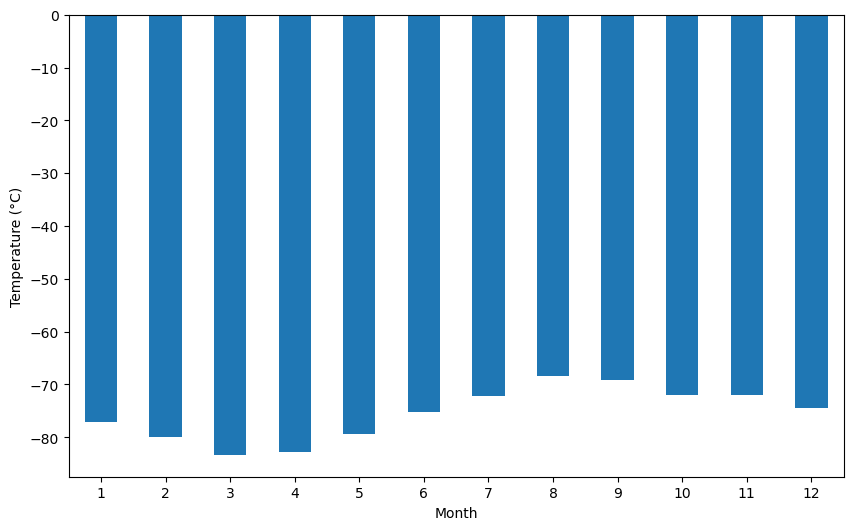

In [44]:
# Plot the average temperature by month
average_low_temperature_by_month = df.groupby('month')['min_temp'].mean()
# Plotting the average temperature by month
plt.figure(figsize=(10, 6))
average_low_temperature_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



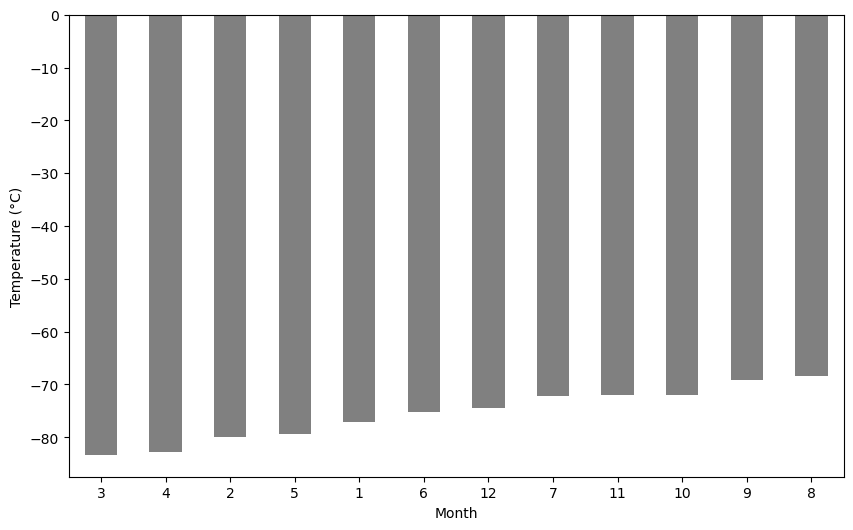

In [50]:
# Identify the coldest and hottest months in Curiosity's location
average_low_temperature_by_month = df.groupby('month')['min_temp'].mean()

# Find coldest and warmest months
coldest_month = average_low_temperature_by_month.idxmin()
warmest_month = average_low_temperature_by_month.idxmax()

# Sort the DataFrame by average low temperature
sorted_months = average_low_temperature_by_month.sort_values()

# Plot the average minimum daily temperature for all months from lowest to highest
plt.figure(figsize=(10, 6))
sorted_months.plot(kind='bar', color='gray')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.show()


In [53]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

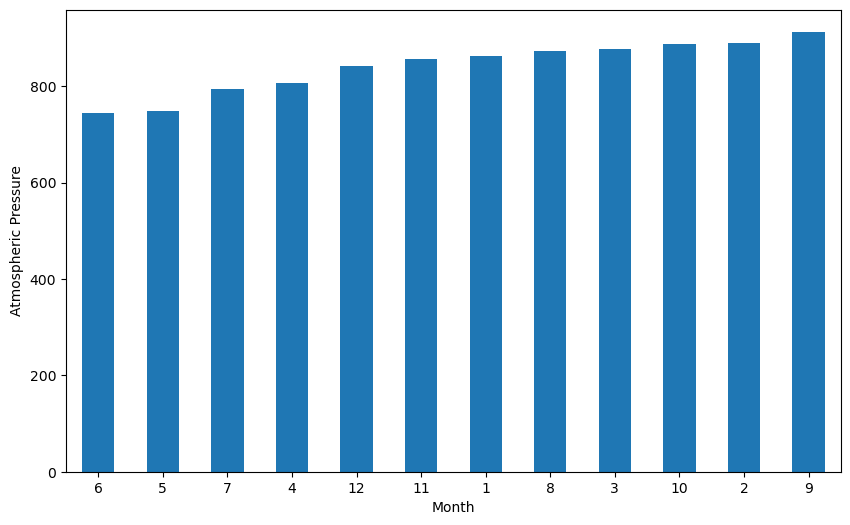

In [57]:
# Plot the average pressure by month
sorted_pressure = average_pressure_by_month.sort_values()
plt.figure(figsize=(10, 6))
sorted_pressure.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

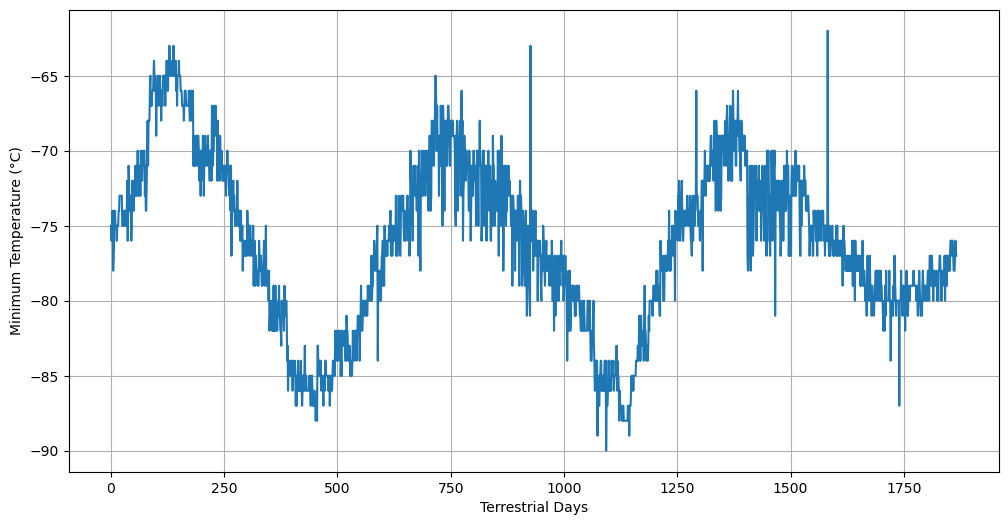

In [61]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Plot the daily minimum temperature against terrestrial days
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['min_temp'])
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [62]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [63]:
driver.quit()